Hiring/Retaining employees is an expensive process that requires capital, time and skills.

Average companies lose 1-2%of their total revenue on the time it takes to bring a new hire upto speed.

Companies spend 15-20% of the employee's salary to recruit a new candidate.

In this project, we will train a ML model to predict which employees are more likely to quit based on their features such as :

1. Job Involvement
2. Education
3. Job Satisfaction
4. Performance Rating
5. Relationship Satisfaction
6. Work Life Balance


#### Importing Required Libraries

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import pickle


In [702]:
# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

#### Loading the input data and doing basic EDA

In [703]:
employee=pd.read_csv('/Users/leenasingh/Documents/ML Projects/Employee Attrition Project Coursera/Data/employee_data.csv')
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [704]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [705]:
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [706]:
#checking if any nulls present
employee.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [707]:
employee['Attrition'].value_counts(normalize=True)
#data is imbalanced which will need to be rectified while training the ML model

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

#### Feature Engineering : Converting Categorical columns to numerical

In [708]:

employee['Attrition']=employee['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
employee['OverTime']=employee['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)
employee['Over18']=employee['Over18'].apply(lambda x: 1 if x=='Y' else 0)

#Creating employee_df for model training
employee_model=employee

#one hot encoding of non-ordered columns
employee_model=pd.get_dummies(data=employee_model, 
                        columns=['Gender','MaritalStatus','BusinessTravel','Department','EducationField','JobRole'],drop_first=False)



employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


#### Histogram to check column distributions

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

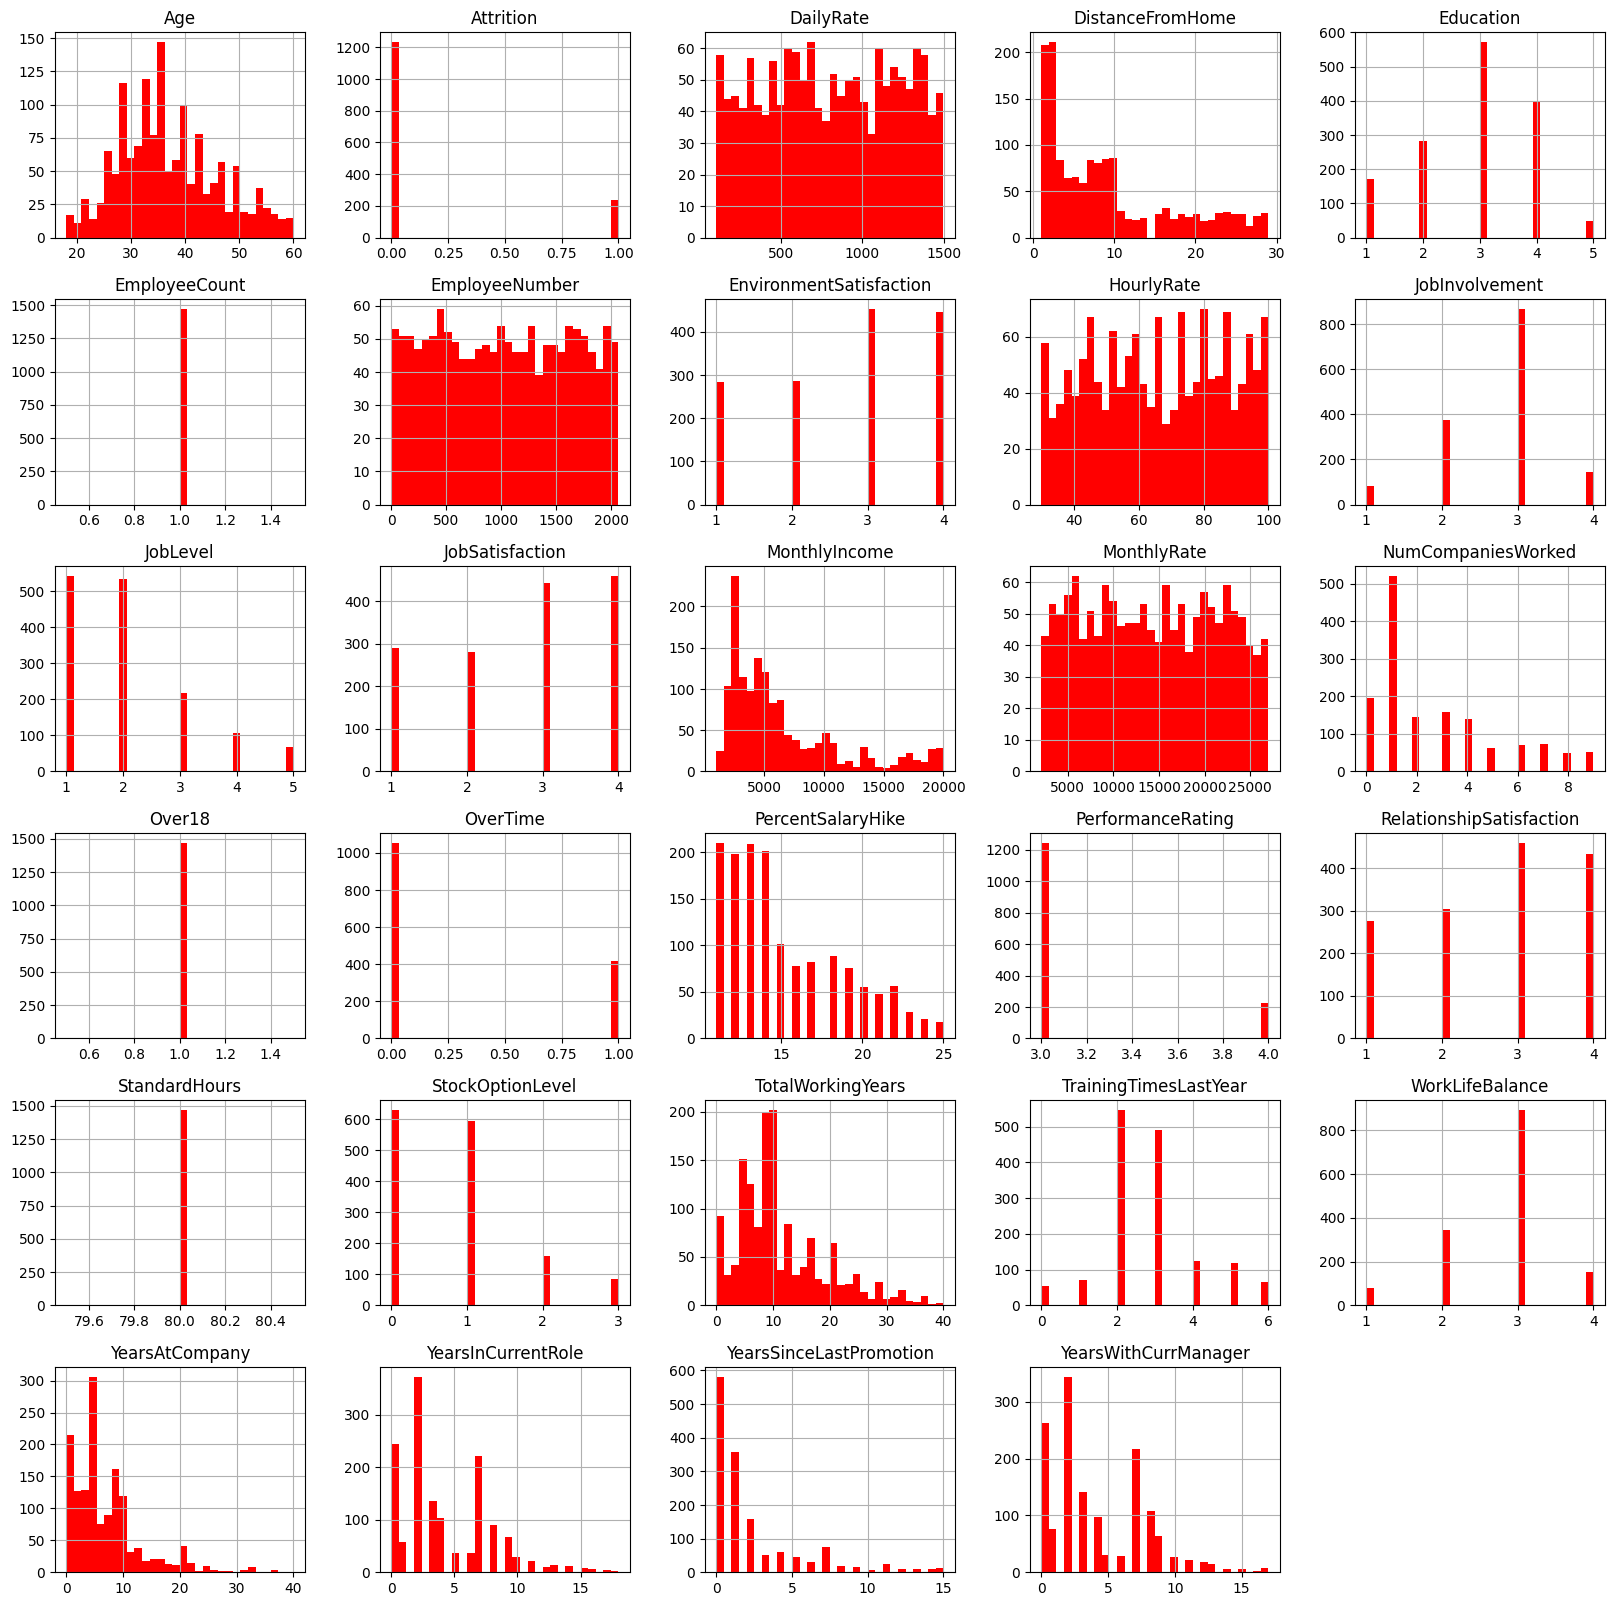

In [709]:
employee.hist(bins=30, figsize=(20,20),color='r')

In [710]:
#From the above charts, we can observe that StandardHours, Over18, EmployeeCount are redundant columns that provide no valuable info
employee_model.drop(columns=['StandardHours','Over18','EmployeeCount', 'EmployeeNumber'],inplace=True)
employee.drop(columns=['StandardHours','Over18','EmployeeCount', 'EmployeeNumber'],inplace=True)


#### Segregating and anlaysing the data by Attrition Status

In [711]:
employee_left=employee.loc[employee['Attrition']==1]
employee_stayed=employee.loc[employee['Attrition']==0]


In [712]:
employee_left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [713]:
employee_stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


#### EDA visualization for each column to analyse attrition patterns

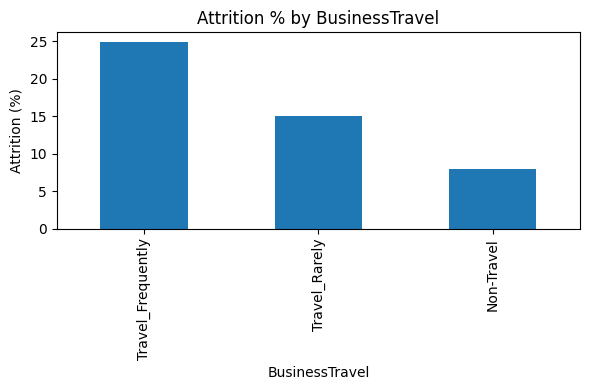

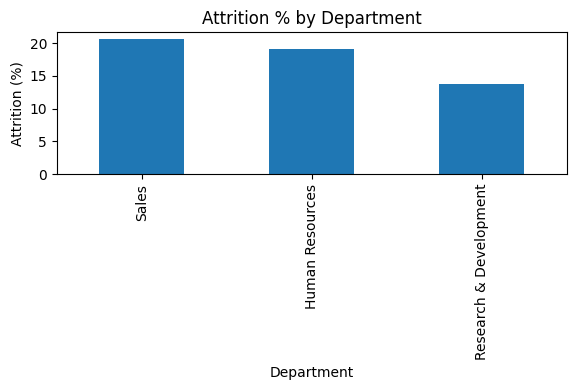

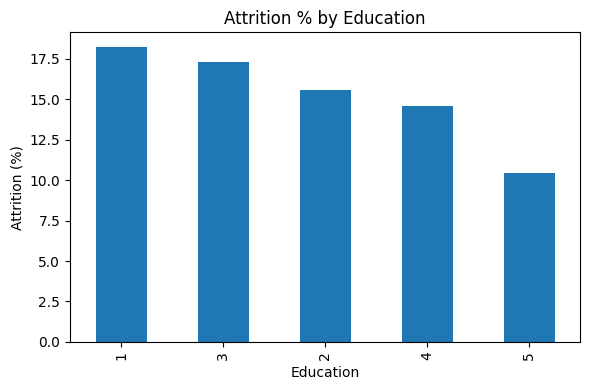

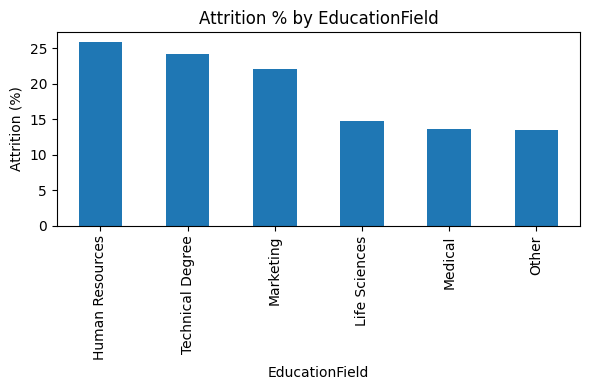

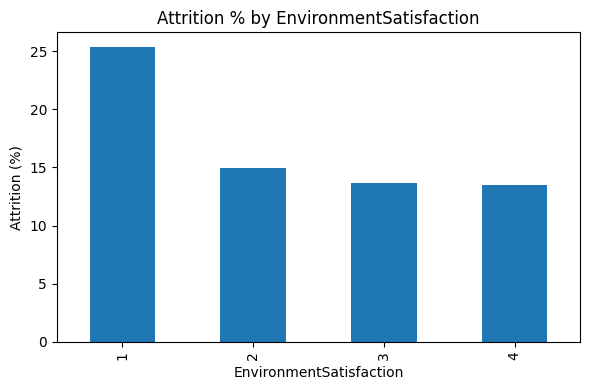

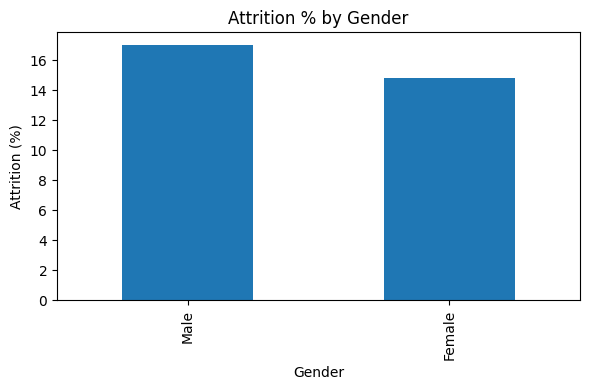

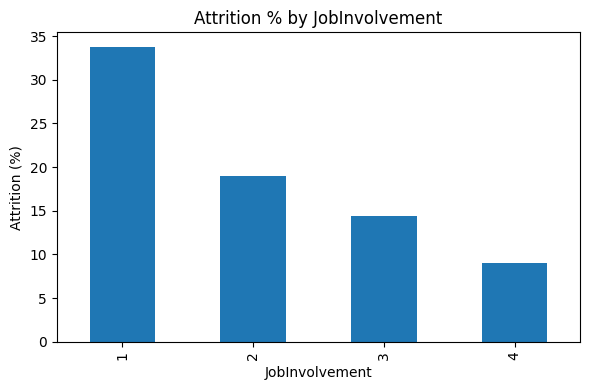

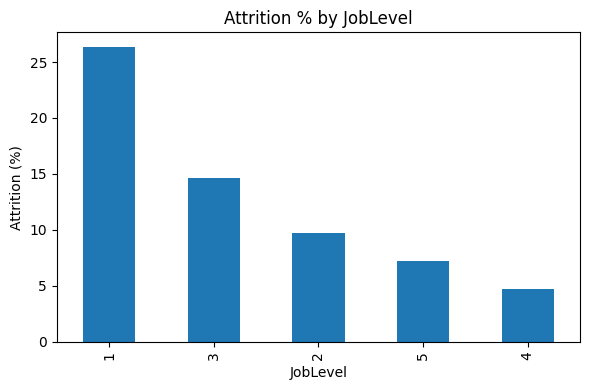

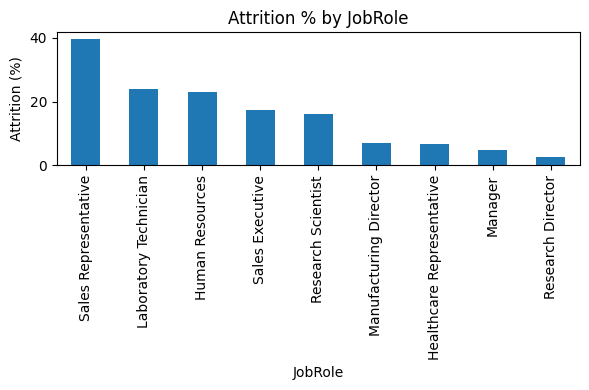

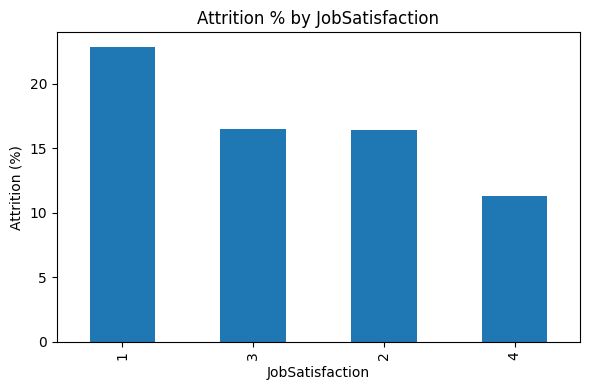

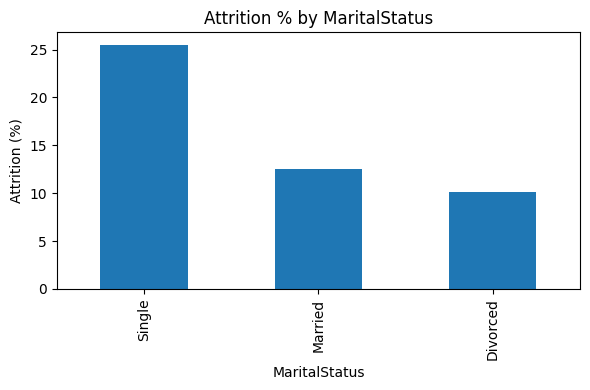

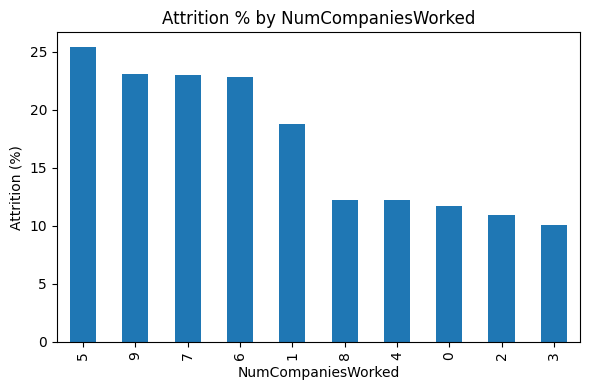

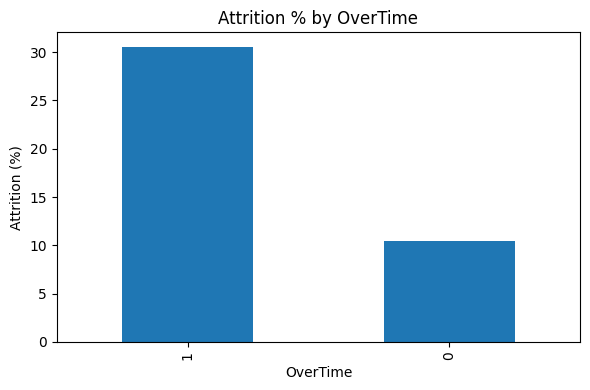

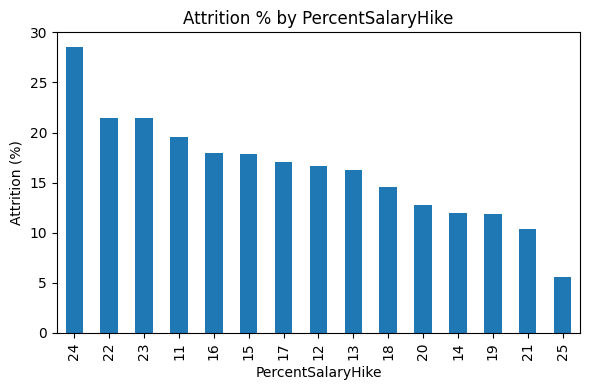

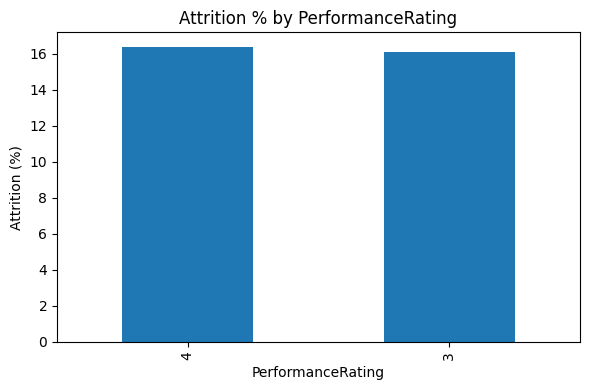

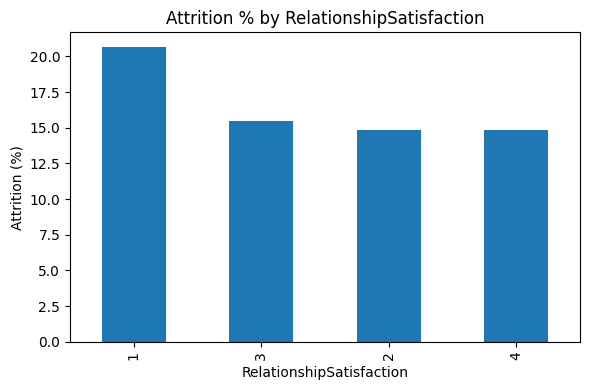

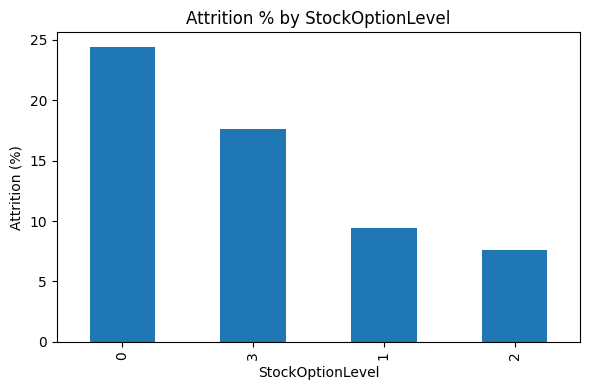

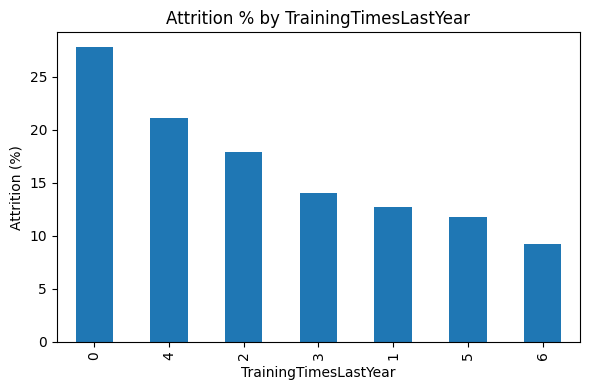

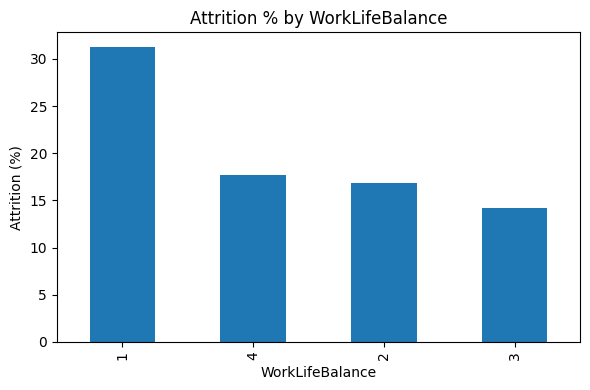

In [714]:
target = 'Attrition'

for col in employee.columns:
    if col == target:
        continue

    # Skip continuous columns with too many unique values
    if employee[col].nunique() > 15:
        continue
    
    ct = pd.crosstab(employee[col], employee['Attrition'], normalize='index') * 100
    # Sort by attrition %
    ct = ct.sort_values(by=1, ascending=False)

    ct[1].plot(
        kind='bar',
        figsize=(6,4)
    )

    plt.title(f'Attrition % by {col}')
    plt.xlabel(col)
    plt.ylabel('Attrition (%)')
    plt.tight_layout()
    plt.show()


Attributes of people who left:
1. Poor Work Life Balance
2. Less Training Time
3. Zero Stock Option Level
4. Low Relationship Satisfaction
5. Siginificantly more OverTime
6. Higher num of companies worked in the past
7. Single
8. Low Job Satisfaction
9. Job Role: Sales Representative
10. Job Level: 1
11. Low Job Involvement 
12. Gender: Male
13. Frequent Business Travel
14. Education Level: 1
15. HR, Technical, and Marketing education backgrounds

Other Factors of people who left as compared to people who stayed:
1. Lower Average age
2. Lower Monthly income
3. More Distance from home
4. Total Working Years is significantly less
5. Lesser Years at company
6. Lesser Years in current role
7. Lesser Years with current manager


#### Heatmap for analysing correlations

/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/3183120920.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(employee_left.corr(), annot=True)
/Users/leenasingh/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

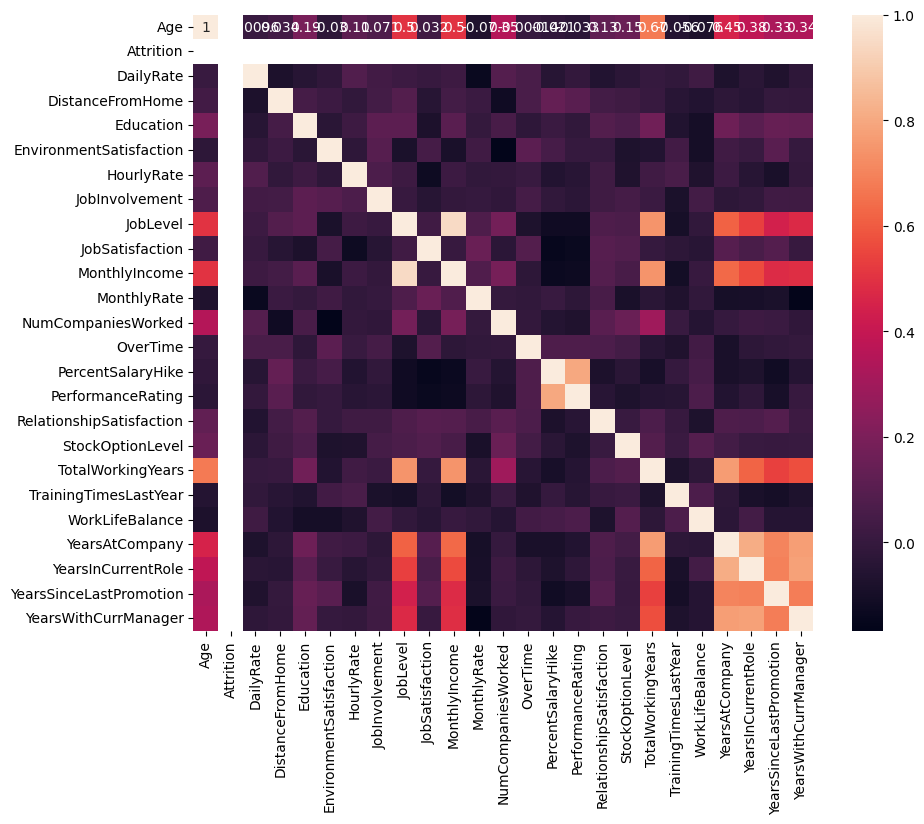

In [715]:

f, ax= plt.subplots(figsize=(10,8))
sns.heatmap(employee_left.corr(), annot=True)

Strong correlation between 
1. performance rating and percent salary hike.
2. Monthly income and job level
3. Monthly income and total working years.
4. Job level and total working years.


#### Analysing monthly income by JobRole

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

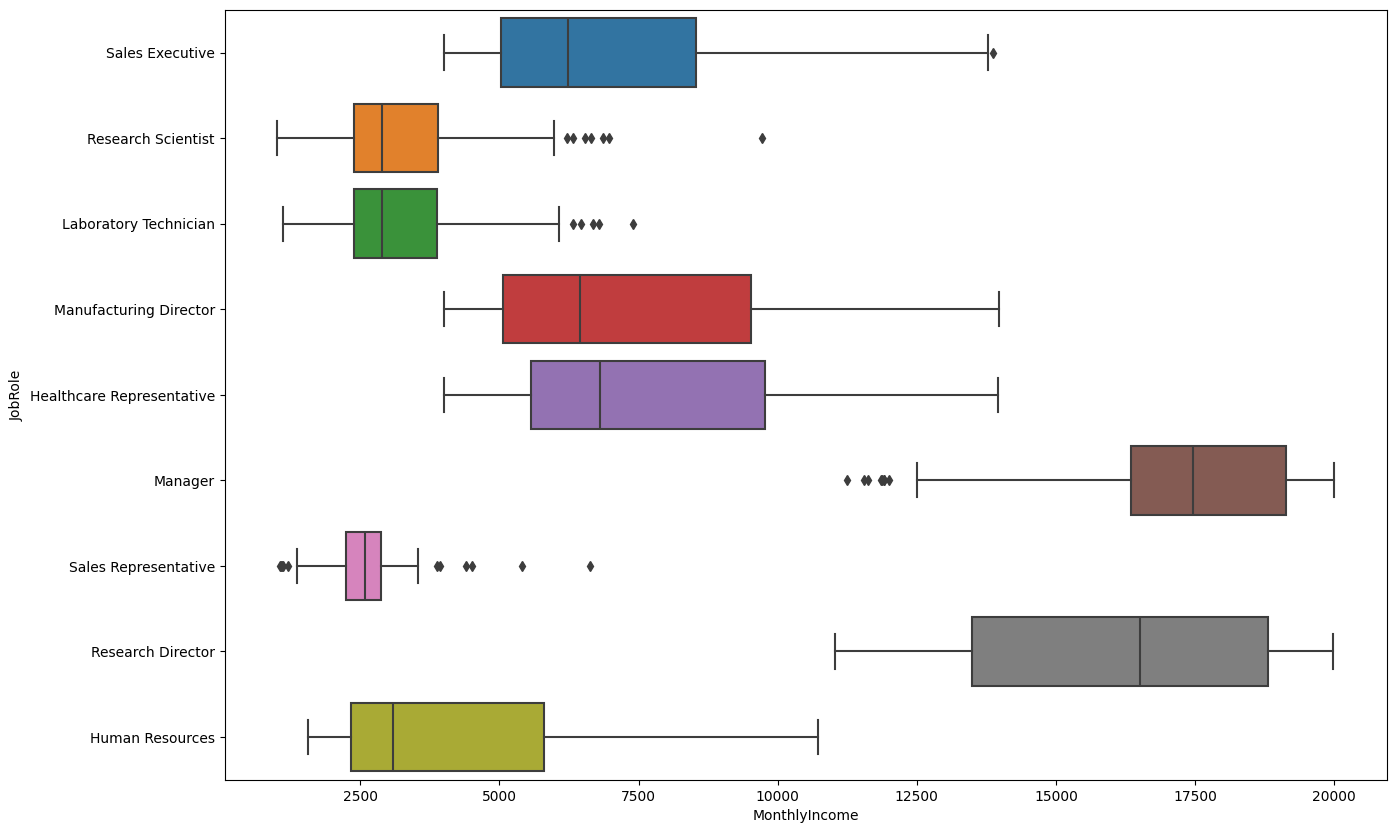

In [716]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee)

Manager and Research Director tend to have higher salaries.

#### Plotting and anlaysing continous variable using KDE plot

/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/3001307647.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_left['DistanceFromHome'], label='Employees who left', shade=True, color='r')
/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/3001307647.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_stayed['DistanceFromHome'], label='Employees who stayed', shade=True, color='b')


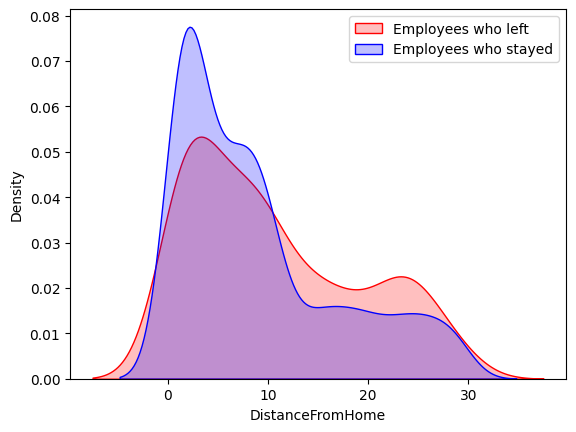

In [717]:
sns.kdeplot(employee_left['DistanceFromHome'], label='Employees who left', shade=True, color='r')
sns.kdeplot(employee_stayed['DistanceFromHome'], label='Employees who stayed', shade=True, color='b')
plt.legend()



# KDE plot is used to see the distribution shape of your data
# To understand probability densities better than a basic histogram.

As distance increases, the number of people who left tend to be higher than the ones who stayed.

/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/1730100499.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_left['YearsWithCurrManager'], label='Employees who left', shade=True, color='r')
/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/1730100499.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_stayed['YearsWithCurrManager'], label='Employees who stayed', shade=True, color='b')


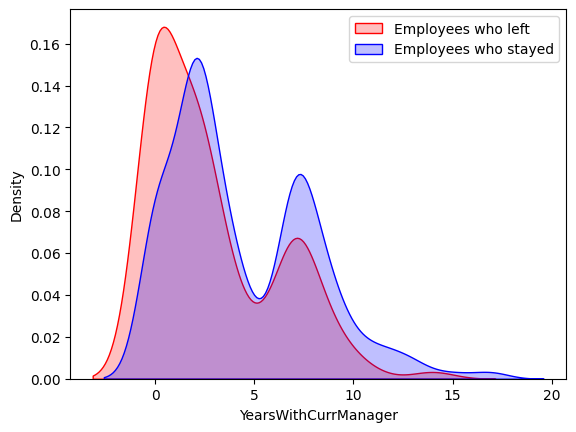

In [718]:
sns.kdeplot(employee_left['YearsWithCurrManager'], label='Employees who left', shade=True, color='r')
sns.kdeplot(employee_stayed['YearsWithCurrManager'], label='Employees who stayed', shade=True, color='b')
plt.legend()

Employees who stayed tend to have higher working years with current manager

/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/676767648.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_left['TotalWorkingYears'], label='Employees who left', shade=True, color='r')
/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/676767648.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_stayed['TotalWorkingYears'], label='Employees who stayed', shade=True, color='b')


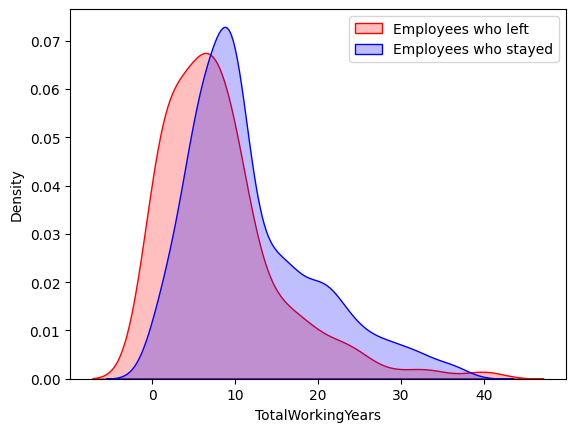

In [719]:
sns.kdeplot(employee_left['TotalWorkingYears'], label='Employees who left', shade=True, color='r')
sns.kdeplot(employee_stayed['TotalWorkingYears'], label='Employees who stayed', shade=True, color='b')
plt.legend()

As the number of total working years increases, employees tend to stay more. 

/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/2637035532.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_left['HourlyRate'], label='Employees who left', shade=True, color='r')
/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/2637035532.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_stayed['HourlyRate'], label='Employees who stayed', shade=True, color='b')


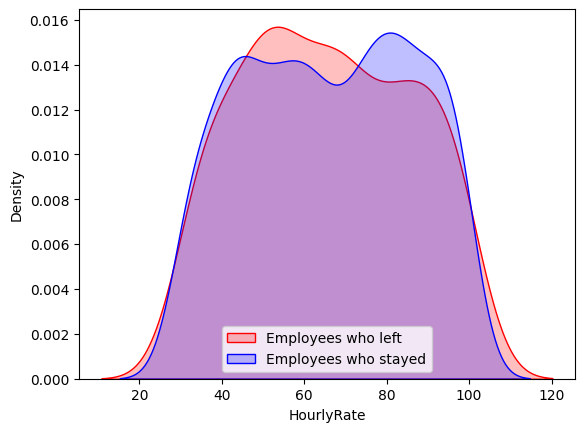

In [720]:
sns.kdeplot(employee_left['HourlyRate'], label='Employees who left', shade=True, color='r')
sns.kdeplot(employee_stayed['HourlyRate'], label='Employees who stayed', shade=True, color='b')
plt.legend()

Employees who left tend to have lower hourly rates.

/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/296788636.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_left['OverTime'], label='Employees who left', shade=True, color='r')
/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/296788636.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_stayed['OverTime'], label='Employees who stayed', shade=True, color='b')


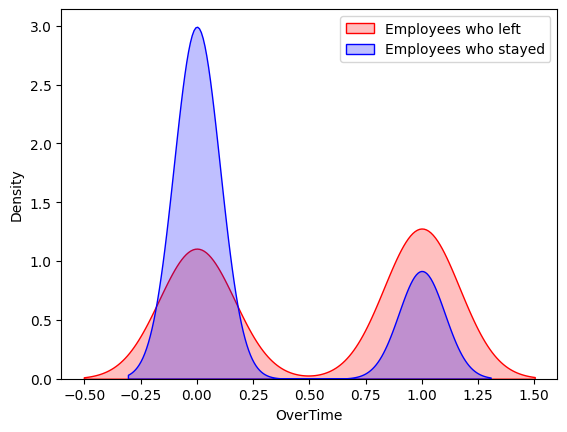

In [721]:
sns.kdeplot(employee_left['OverTime'], label='Employees who left', shade=True, color='r')
sns.kdeplot(employee_stayed['OverTime'], label='Employees who stayed', shade=True, color='b')
plt.legend()

Employees who left tend to do significantly more overtime.

/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/3462751461.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_left['PercentSalaryHike'], label='Employees who left', shade=True, color='r')
/var/folders/8w/qfs78brj4918m385ryck9h000000gn/T/ipykernel_28379/3462751461.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(employee_stayed['PercentSalaryHike'], label='Employees who stayed', shade=True, color='b')


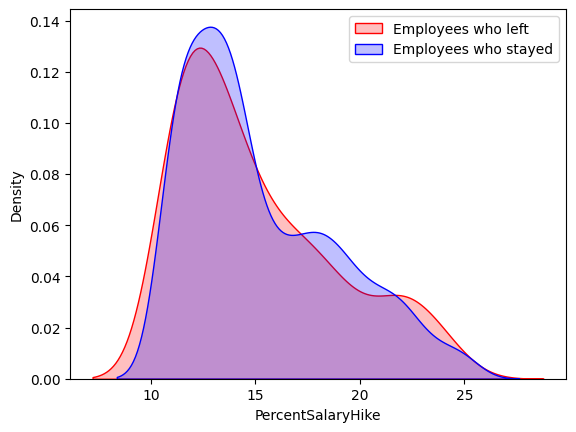

In [722]:
sns.kdeplot(employee_left['PercentSalaryHike'], label='Employees who left', shade=True, color='r')
sns.kdeplot(employee_stayed['PercentSalaryHike'], label='Employees who stayed', shade=True, color='b')
plt.legend()

There is no significant impact of Percent Salary Hike as attrition is evenly distributed in all ranges.

##### Quick Overall Summary from EDA

Attrition in this organization is primarily driven by early-career employees in high-pressure roles with low growth signals, higher workload, and weaker organizational attachment

In [723]:
employee_model.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


#### Model Training

In [724]:
#dropping leaky columns

LEAKY_COLS = [
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'StockOptionLevel',
    'Attrition'
]

X = employee_model.drop(columns=LEAKY_COLS)

In [725]:

y=employee_model['Attrition']

X.shape,y.shape

((1470, 45), (1470,))

Splitting train-test

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

Scaling the input data

In [ ]:


scaler=StandardScaler()
X=scaler.fit_transform(X_train)
y=scaler.transform(X_test)



Logistic Regression

In [ ]:


model=LogisticRegression(
    penalty="l2",
    class_weight="balanced",
    max_iter=1000
)

model=model.fit(X_train, y_train)

y_pred=model.predict(X_test)


y_pred


/Users/leenasingh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

##### Metrics

In [729]:
print(accuracy_score(y_test,y_pred))

0.7380952380952381


In [730]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       236
           1       0.41      0.74      0.53        58

    accuracy                           0.74       294
   macro avg       0.67      0.74      0.67       294
weighted avg       0.82      0.74      0.76       294



In [731]:
confusion_matrix(y_test, y_pred)

array([[174,  62],
       [ 15,  43]])

In [732]:
y_score=model.predict_proba(X_test)[:,1]

roc_auc=roc_auc_score(y_test,y_score)
print(roc_auc)

0.7688486265341905


In [733]:
model.coef_

array([[ 7.61439970e-03, -1.29923178e-04,  3.19165409e-02,
         2.42127029e-01, -2.84913826e-01,  1.29517843e-02,
        -3.58385827e-01, -4.00712603e-02, -1.40339951e-01,
        -7.46676818e-05,  2.57412614e-05,  3.19355016e-02,
         9.15962622e-01, -4.64828770e-02,  2.53437642e-01,
         4.75859827e-02, -1.99663317e-02, -5.90910966e-02,
        -2.11311474e-01, -7.54306454e-02,  2.05140170e-01,
        -2.27402193e-01, -2.23840645e-01,  5.80952362e-01,
        -2.53319971e-01,  3.99063047e-01, -1.60335515e-02,
        -2.42652771e-03, -2.61584439e-01,  3.93720491e-01,
         4.24052663e-02, -7.94019714e-02,  1.94039437e-01,
        -1.89974905e-01, -7.34553716e-03,  1.69987234e-01,
        -1.24910687e-01,  1.32137952e-02,  2.45301274e-01,
        -3.13564922e-03, -1.73648421e-01, -6.73901216e-02,
        -1.37533136e-01,  9.10353298e-02,  2.86777140e-01]])

Plotting the important features

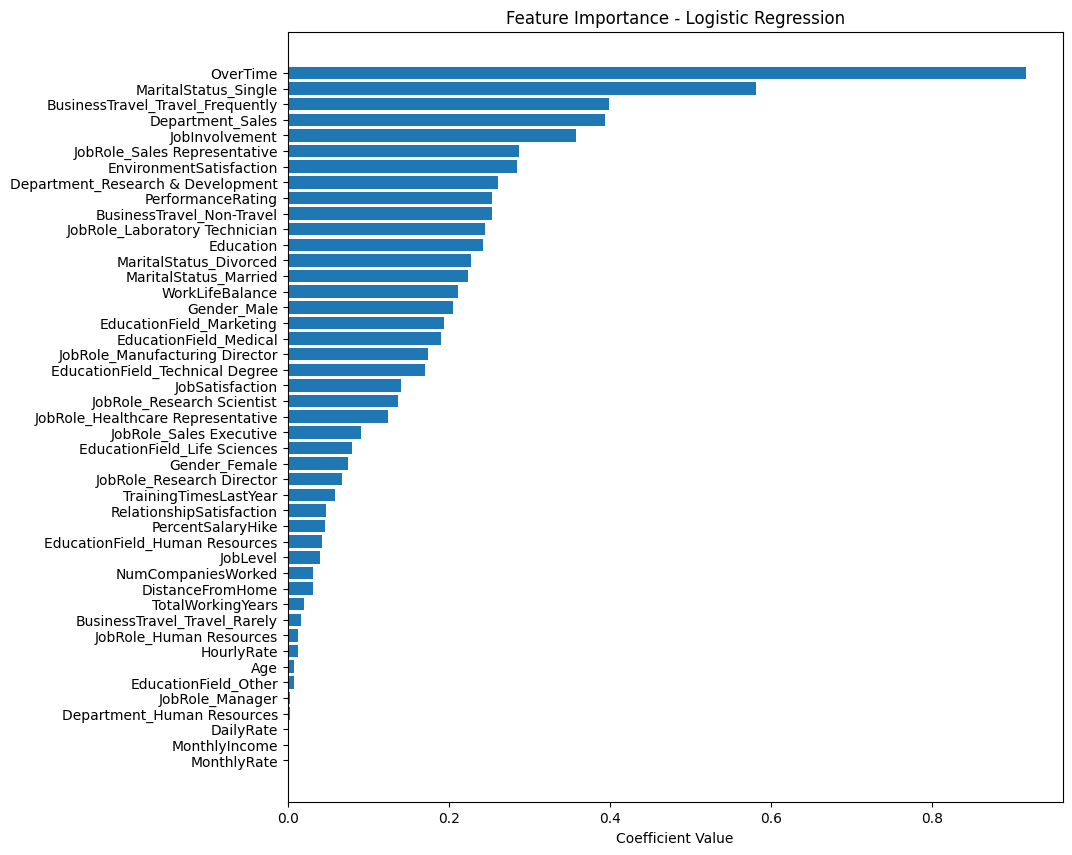

In [734]:
features=model.feature_names_in_
coef=model.coef_[0]
feature_importance=pd.DataFrame({'Feature': features, 'Importance':coef})
feature_importance['Absolute Importance']= np.abs(feature_importance['Importance'])
feature_importance_pickle=feature_importance
feature_importance=feature_importance.sort_values(by=['Absolute Importance'],ascending=True)



# Plot top features
plt.figure(figsize=(10,10))
plt.barh(feature_importance['Feature'], feature_importance['Absolute Importance'])
plt.xlabel("Coefficient Value")
plt.title("Feature Importance - Logistic Regression")
plt.show()

#### Creating pickle files for the model

In [ ]:


# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler / encoder
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save feature list (VERY IMPORTANT)
with open("features.pkl", "wb") as f:
    pickle.dump(features, f)
    
    
# feature importances
with open("feature_importance.pkl", "wb") as f:
    pickle.dump(feature_importance_pickle, f)

In [736]:
#  XGBoost Classifier

# param_grid = {
#     'n_estimators': [50, 100, 150],     # Number of trees
#     'max_depth': [3, 4, 5],            # Tree depth
#     'learning_rate': [0.01, 0.1, 0.2], # Learning rate
#     'subsample': [0.7, 0.8, 1.0],      # Sample ratio
#     'colsample_bytree': [0.7, 0.8, 1.0]# Feature ratio per tree
# }

# import xgboost as xg
# from xgboost import XGBClassifier

# # Initialize the model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# # GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring='roc_auc',  # Could be 'accuracy' too
#     cv=3,               # 3-fold cross-validation
#     verbose=1,
#     n_jobs=-1           # Use all CPU cores
# )

# # Train the model
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

# # Train best model on entire train set
# Grid_CV_model = grid_search.best_estimator_

# from sklearn.calibration import CalibratedClassifierCV

# best_model = CalibratedClassifierCV(
#     Grid_CV_model,
#     method='isotonic',
#     cv=3
# )

# best_model.fit(X_train, y_train)

# y_pred = best_model.predict(X_test)
# y_score = best_model.predict_proba(X_test)[:, 1]

# Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # ROC-AUC Score
# roc_auc = roc_auc_score(y_test, y_score)
# print("ROC-AUC Score:", roc_auc)

# #classification report
# print(classification_report(y_test,y_pred))

# #confusion matrix
# print(confusion_matrix(y_test,y_pred))

# import matplotlib.pyplot as plt
# from xgboost import plot_importance

# # If best_model is from GridSearchCV
# final_model = best_model.get_booster()


# fig, ax = plt.subplots(figsize=(10, 10))
# plot_importance(final_model, ax=ax)
# plt.show()
# model_features=best_model.get_booster().feature_names
# feature_importance=best_model.get_booster().get_score(importance_type='gain')